Лабораторная работа №5

Задание №1
Описательная статистика. В таблице (исходные данные для задания)
приведены размеры диаметров шайб 100 заклепок (в мм), изготовленных станком
(который делает их тысячами). Все контролируемые условия, в которых работал
станок, оставались неизменными. В тоже время диаметры головок раз от разу
несколько изменялись. Характерная черта случайных колебаний: изменения
выглядят бессистемными, хаотичными.

In [1]:
data = [13.496, 11.563, 13.254, 13.444, 12.934, 13.028, 11.990, 11.689, 12.169, 13.192, 13.368, 12.530, 13.195, 12.131, 12.497, 12.883, 13.494, 14.594, 11.206,
        13.257, 12.849, 12.609, 13.233, 12.442, 13.715, 13.806, 13.519, 13.118, 13.296, 12.680, 12.919, 15.099, 14.126, 12.140, 11.683, 13.774, 12.353, 11.845,
        13.142, 13.402, 13.530, 12.848, 14.925, 14.760, 12.337, 12.996, 14.606, 12.829, 12.778, 14.027, 11.194, 13.481, 13.277, 12.661, 13.039, 12.870, 11.823,
        11.869, 14.633, 11.951, 13.380, 12.536, 12.941, 12.096, 13.920, 13.114, 13.278, 12.672, 12.557, 12.918, 12.521, 12.164, 12.435, 12.126, 13.850, 13.121,
        14.235, 12.590, 12.575, 12.327, 13.075, 13.501, 13.005, 10.920, 11.382, 13.034, 13.278, 12.027, 13.074, 13.193, 13.521, 12.335, 12.903, 13.557, 13.348,
        12.501, 12.767, 13.509, 12.842, 13.354]

1. Для выборки диаметров головок заклепок вычислить среднее значение, медиану, дисперсию, нижнюю и
верхнюю квартили, минимальный и максимальный элементы.

In [2]:
def get_median(information):
    if len(information) % 2:
        return sorted(information)[len(information) // 2]
    return sum(sorted(information)[len(information) // 2 - 1:len(information) // 2 + 1]) / 2

def get_quartiles(information):
    information = sorted(information)
    left_quartiles = get_median(information[:len(information) // 2])
    right_quartiles = get_median(information[(len(information) // 2)+(len(information) % 2):])
    return [left_quartiles, right_quartiles]

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data_for_table = [sum(data)/len(data), get_median(data), sum([(i-sum(data)/len(data))**2 for i in data])/len(data),
                  get_quartiles(data)[0], get_quartiles(data)[1], min(data), max(data)]
index = ['Среднее значение', 'Медиана', 'Дисперсия', 'Нижний квартиль',
         'Верхний квартиль', 'Минимальный элемент', 'Максимальный элемент']
table = pd.DataFrame({'Значение': data_for_table}, index=index)
print(table)

                       Значение
Среднее значение      12.945800
Медиана               12.968500
Дисперсия              0.651321
Нижний квартиль       12.469500
Верхний квартиль      13.391000
Минимальный элемент   10.920000
Максимальный элемент  15.099000


2. Сгруппировать данные таблицы в выбранном диапазоне от X1мм до X2мм с шагом группировки h мм и
вычислить частоты попадания в полученные интервалы группировки. Вывести гистограмму и подобранную
по выборке кривую плотности нормального распределения.

Шаг группировки: 0.85
Частота попадания в 1 интервал: 7
Частота попадания в 2 интервал: 26
Частота попадания в 3 интервал: 43
Частота попадания в 4 интервал: 18
Частота попадания в 5 интервал: 6


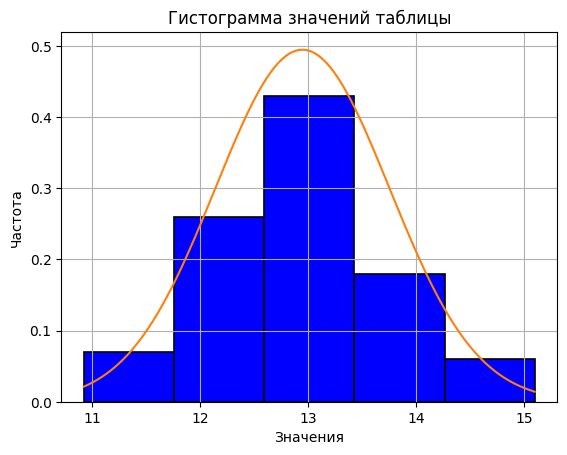

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
h = 0.85
num_bins = round((max(data)-min(data))/h)
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, num_bins, facecolor='blue', edgecolor='black', linewidth=1.2)
ax.set_title('Гистограмма значений таблицы')
ax.set_xlabel('Значения')
ax.set_ylabel('Частота')
mu = np.mean(data)
sigma = np.std(data)
y_vals = ax.get_yticks()
ax.set_yticklabels([x/100 for x in y_vals])
bell_curve_x = np.arange(min(data), max(data), 0.001)
bell_curve_y = list(map(lambda x: x*100, norm.pdf(bell_curve_x, mu, sigma)))
plt.plot(bell_curve_x, bell_curve_y)
plt.grid()
print(f'Шаг группировки: {h}')
for number, i in enumerate(n):
    print(f'Частота попадания в {number+1} интервал: {int(i)}')

3. Для выборки диаметров головок заклепок построить гистограмму частот.

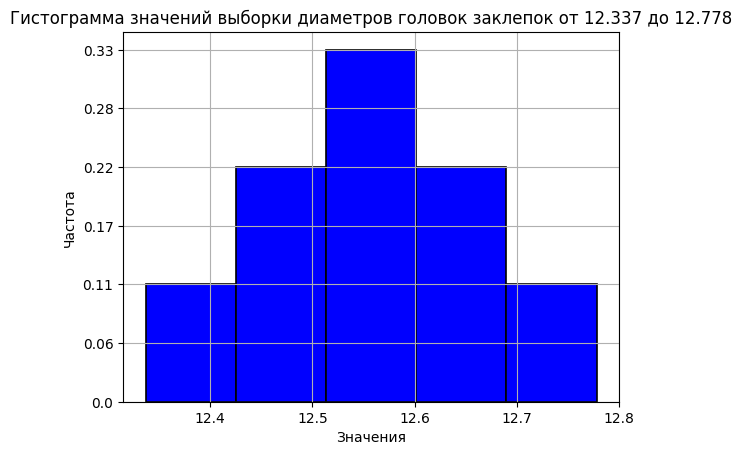

In [5]:
left_border = 12.337
right_border = 12.778
sample = [i for i in data if left_border <= i <= right_border]
num_bins = 5
fig, ax = plt.subplots()
ax.set_title(f'Гистограмма значений выборки диаметров головок заклепок от {left_border} до {right_border}')
ax.set_xlabel('Значения')
ax.set_ylabel('Частота')
plt.grid()
n, bins, patches = plt.hist(sample, num_bins, facecolor='blue', edgecolor='black', linewidth=1.2)
y_vals = ax.get_yticks()
decrease = ax.set_yticklabels([round(x/len(sample),2) for x in y_vals])

4. Cоздать таблицу основных статистических характеристик и разместить ее с соответствующим заголовком
справа от исходных данных. Уметь объяснить смысл каждой статистики.

In [6]:
def get_mode(information):
    data_for_mode = dict()
    for i in information:
        if data_for_mode.get(i):
            data_for_mode[i]+=1
        else:
            data_for_mode[i] = 1
    if max(data_for_mode.values()) == 1:
        return 'Все числа'
    else:
        mode = [i for i in data_for_mode.keys() if data_for_mode[i] == max(data_for_mode.values())]
        return ' '.join(list(map(lambda x: str(x), mode)))

In [7]:
data_for_sample_table = [len(sample), min(sample), max(sample), max(sample) - min(sample),
                         sum(sample)/len(sample), get_mode(sample), get_median(sample), get_quartiles(sample)[0],
                         get_quartiles(sample)[1], sum([(i-sum(sample)/len(sample))**2 for i in sample])/len(sample)]
index = ['Объем выборки', 'Минимальный элемент', 'Максимальный элемент', 'Размах выборки', 'Среднее арифметическое выборки',
         'Мода', 'Медиана', 'Нижний квартиль', 'Верхний квартиль', 'Дисперсия']
sample_table = pd.DataFrame({'Значение': data_for_sample_table}, index=index)
print(f'Выборка: {sample}')
print(f'{sample_table}\n')
for number, i in enumerate(n):
    print(f'Частота попадания в {number+1} интервал: {int(i)}')
    print(f'Относительная частота попадания в {number+1} интервал: {round(int(i)/len(sample), 3)}')

Выборка: [12.53, 12.497, 12.609, 12.442, 12.68, 12.353, 12.337, 12.778, 12.661, 12.536, 12.672, 12.557, 12.521, 12.435, 12.59, 12.575, 12.501, 12.767]
                                 Значение
Объем выборки                          18
Минимальный элемент                12.337
Максимальный элемент               12.778
Размах выборки                      0.441
Среднее арифметическое выборки  12.557833
Мода                            Все числа
Медиана                           12.5465
Нижний квартиль                    12.497
Верхний квартиль                   12.661
Дисперсия                        0.014641

Частота попадания в 1 интервал: 2
Относительная частота попадания в 1 интервал: 0.111
Частота попадания в 2 интервал: 4
Относительная частота попадания в 2 интервал: 0.222
Частота попадания в 3 интервал: 6
Относительная частота попадания в 3 интервал: 0.333
Частота попадания в 4 интервал: 4
Относительная частота попадания в 4 интервал: 0.222
Частота попадания в 5 интервал: 2
Относите

5. Обработать данные с целью выяснения распределения наблюдаемой случайной величины. Выдвинуть
статистическую гипотезу с последующей ее проверкой

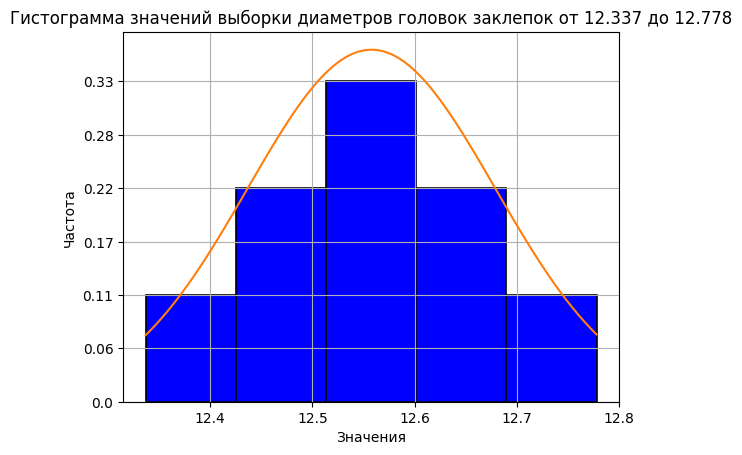

In [8]:
ig, ax = plt.subplots()
num_bins = 5
n, bins, patches = ax.hist(sample, num_bins, facecolor='blue', edgecolor='black', linewidth=1.2)
ax.set_title(f'Гистограмма значений выборки диаметров головок заклепок от {left_border} до {right_border}')
ax.set_xlabel('Значения')
ax.set_ylabel('Частота')
y_vals = ax.get_yticks()
decrease = ax.set_yticklabels([round(x/len(sample),2) for x in y_vals])
mu = np.mean(sample)
sigma = np.std(sample)
bell_curve_x = np.arange(min(sample), max(sample), 0.001)
bell_curve_y = list(map(lambda x: x*2, norm.pdf(bell_curve_x, mu, sigma)))
plt.plot(bell_curve_x, bell_curve_y)
plt.grid()

Задание №2
Cтуденты ответили на два вопроса анкеты «ваш год рождения» и «ваш возраст».
Из их ответов сформирована таблица: столбец Р=«год рождения студента» и
столбец Q=«возраст студента». Выяснилось, что значение коэффициента корреляции
признаков P и Q зависит от месяца, в котором проводилось анкетирование. Укажите
два месяца, которым соответствует наименьшее (по модулю) значение коэффициента
корреляции признаков P и Q.

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Генерируем случайные дни рождения студентов
birthday_data = pd.DataFrame({"birthday": pd.date_range(start='1/1/1998', end='1/1/2006', periods=100)})
for num, mn in enumerate("January February March April May June July August September October November December".split(), start=1):
    # Делаем имитацию того, что опрос проводился в середине каждго месяца в году.
    birthday_data[mn] = birthday_data.birthday.apply(lambda x: int((pd.to_datetime(f'2022-{num}-15 00:00:00') - x).days/365.2 ))
# Добавляем колонку года рождения для корреляции
birthday_data['year_birthday'] = birthday_data.birthday.apply(lambda x: x.year)
# Проводим корреляцию, сортируем значения, выводим 2 месяца с наименьшим (по модулю) значением коэффициента
# корреляции признаков "год рождения студента" и "возраст студента"
birthday_data.corr().year_birthday.sort_values(ascending=False)[1:3]

June   -0.977472
July   -0.977732
Name: year_birthday, dtype: float64